# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [26]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
clean_city_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []
country_list = []
date_list = []
lat_list = []
lng_list = []
index_count = 1
index_max = 50
set_count = 1
units = 'imperial'

print('Beginning Data Retrieval')
print('----------------------------------------')

for index, city in enumerate(cities, start = 1):
    
    base_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&units={units}&appid={weather_api_key}'
    
    try: 
        weather_json = requests.get(base_url).json()
        max_temp_list.append(weather_json['main']['temp_max'])
        humidity_list.append(weather_json['main']['humidity'])
        cloudiness_list.append(weather_json['clouds']['all'])
        wind_speed_list.append(weather_json['wind']['speed'])
        country_list.append(weather_json['sys']['country'])
        date_list.append(weather_json['dt'])
        clean_city_list.append(city)
        lat_list.append(weather_json['coord']['lat'])
        lng_list.append(weather_json['coord']['lon'])
        print(f'Processing record {index_count} of Set {set_count} | {city}')
        index_count = index_count + 1
        if index_count > index_max:
            index_count = 1
            set_count = set_count + 1
            
    except:
        print('City not found. Skipping...')

print('----------------------------------------')
print('Data Retrieval Complete')
print('----------------------------------------')

Beginning Data Retrieval
----------------------------------------
Processing record 1 of Set 1 | mattru
Processing record 2 of Set 1 | punta arenas
Processing record 3 of Set 1 | bluff
Processing record 4 of Set 1 | qasigiannguit
Processing record 5 of Set 1 | ancud
Processing record 6 of Set 1 | hithadhoo
Processing record 7 of Set 1 | wanning
Processing record 8 of Set 1 | busselton
Processing record 9 of Set 1 | thompson
City not found. Skipping...
Processing record 10 of Set 1 | yellowknife
Processing record 11 of Set 1 | albany
Processing record 12 of Set 1 | vaini
Processing record 13 of Set 1 | tasiilaq
Processing record 14 of Set 1 | aguimes
Processing record 15 of Set 1 | port alfred
Processing record 16 of Set 1 | jamestown
Processing record 17 of Set 1 | bengkulu
Processing record 18 of Set 1 | qaanaaq
Processing record 19 of Set 1 | mataura
Processing record 20 of Set 1 | arraial do cabo
Processing record 21 of Set 1 | mentougou
Processing record 22 of Set 1 | ruteng
Proces

Processing record 31 of Set 4 | nouadhibou
Processing record 32 of Set 4 | esperance
Processing record 33 of Set 4 | coquimbo
Processing record 34 of Set 4 | springbok
Processing record 35 of Set 4 | sao joao da barra
Processing record 36 of Set 4 | salalah
Processing record 37 of Set 4 | kaputa
Processing record 38 of Set 4 | kavieng
Processing record 39 of Set 4 | campo verde
Processing record 40 of Set 4 | marsa matruh
Processing record 41 of Set 4 | charters towers
Processing record 42 of Set 4 | loyga
Processing record 43 of Set 4 | husavik
Processing record 44 of Set 4 | goderich
Processing record 45 of Set 4 | hami
Processing record 46 of Set 4 | neumunster
Processing record 47 of Set 4 | beloha
Processing record 48 of Set 4 | tuktoyaktuk
Processing record 49 of Set 4 | havoysund
Processing record 50 of Set 4 | sola
Processing record 1 of Set 5 | dabola
Processing record 2 of Set 5 | abashiri
Processing record 3 of Set 5 | el retorno
Processing record 4 of Set 5 | kalmunai
Proce

Processing record 21 of Set 8 | akyab
Processing record 22 of Set 8 | san quintin
Processing record 23 of Set 8 | trenton
Processing record 24 of Set 8 | samarai
Processing record 25 of Set 8 | dharchula
Processing record 26 of Set 8 | banda aceh
Processing record 27 of Set 8 | tura
Processing record 28 of Set 8 | zasheyek
Processing record 29 of Set 8 | nelson bay
Processing record 30 of Set 8 | shu
Processing record 31 of Set 8 | bafra
Processing record 32 of Set 8 | hoquiam
Processing record 33 of Set 8 | adrar
Processing record 34 of Set 8 | gorontalo
Processing record 35 of Set 8 | edgewater
Processing record 36 of Set 8 | conde
City not found. Skipping...
Processing record 37 of Set 8 | orange cove
Processing record 38 of Set 8 | manoel urbano
Processing record 39 of Set 8 | kudahuvadhoo
Processing record 40 of Set 8 | bakel
Processing record 41 of Set 8 | harper
Processing record 42 of Set 8 | sangar
Processing record 43 of Set 8 | nalut
Processing record 44 of Set 8 | devonport

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_data = pd.DataFrame({'City': clean_city_list,
                         'Lat': lat_list,
                          'Lng': lng_list,
                          'Max Temp': max_temp_list,
                          'Humidity': humidity_list,
                          'Cloudiness': cloudiness_list,
                          'Wind Speed': wind_speed_list,
                          'Country': country_list,
                          'Date': date_list})
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mattru,7.6244,-11.8332,75.74,94,100,0.85,SL,1624178520
1,punta arenas,-53.1500,-70.9167,33.91,80,0,9.22,CL,1624178379
2,bluff,-46.6000,168.3333,39.79,89,63,11.97,NZ,1624178521
3,qasigiannguit,68.8193,-51.1922,46.65,71,97,7.09,GL,1624178236
4,ancud,-41.8697,-73.8203,45.23,87,99,5.86,CL,1624178522


In [5]:
city_data.to_csv(output_data_file)

In [6]:
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,5.560000e+02
mean,19.894946,19.741744,70.024658,65.847122,56.354317,8.083903,1.624179e+09
std,33.652240,90.914906,15.722517,24.021987,39.221092,5.367554,1.190455e+02
min,-54.800000,-179.166700,22.750000,5.000000,0.000000,0.000000,1.624178e+09
25%,-8.853625,-60.011775,58.222500,51.750000,14.000000,3.905000,1.624179e+09
50%,25.641600,22.623700,72.780000,72.000000,69.000000,6.910000,1.624179e+09
75%,47.579650,102.189975,81.100000,85.250000,95.500000,11.500000,1.624179e+09
max,78.218600,179.316700,109.560000,100.000000,100.000000,29.840000,1.624179e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
humidity_index = city_data.index[city_data['Humidity'] > 100]
humidity_index

Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data.drop(index = humidity_index, inplace = False)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mattru,7.6244,-11.8332,75.74,94,100,0.85,SL,1624178520
1,punta arenas,-53.1500,-70.9167,33.91,80,0,9.22,CL,1624178379
2,bluff,-46.6000,168.3333,39.79,89,63,11.97,NZ,1624178521
3,qasigiannguit,68.8193,-51.1922,46.65,71,97,7.09,GL,1624178236
4,ancud,-41.8697,-73.8203,45.23,87,99,5.86,CL,1624178522
...,...,...,...,...,...,...,...,...,...
551,rapid city,44.0805,-103.2310,74.50,41,75,23.02,US,1624178789
552,san policarpo,12.1791,125.5072,84.72,77,100,5.91,PH,1624178789
553,changji,44.0167,87.3167,88.59,20,20,11.18,CN,1624178789
554,riyadh,24.6877,46.7219,104.14,6,0,16.11,SA,1624178789


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

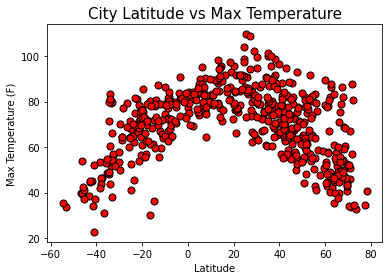

In [27]:
lat_plot = clean_city_data.plot(kind = 'scatter', x = 'Lat', y = 'Max Temp', color = 'red', edgecolor = 'black', s = 50)
plt.title('City Latitude vs Max Temperature', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('scatter_plots/cities_temp_lat.png')

## Latitude vs. Humidity Plot

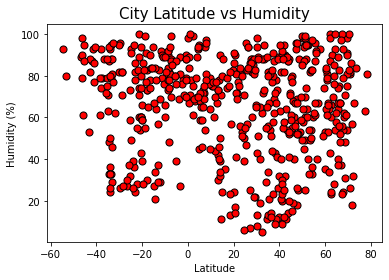

In [28]:
lat_plot = clean_city_data.plot(kind = 'scatter', x = 'Lat', y = 'Humidity', color = 'red', edgecolor = 'black', s = 50)
plt.title('City Latitude vs Humidity', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('scatter_plots/cities_humid_lat.png')

## Latitude vs. Cloudiness Plot

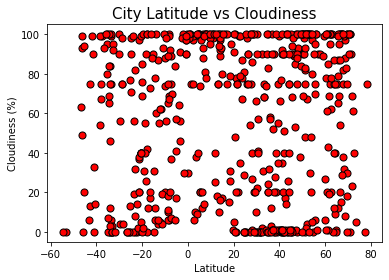

In [29]:
lat_plot = clean_city_data.plot(kind = 'scatter', x = 'Lat', y = 'Cloudiness', color = 'red', edgecolor = 'black', s = 50)
plt.title('City Latitude vs Cloudiness', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('scatter_plots/cities_cloud_lat.png')

## Latitude vs. Wind Speed Plot

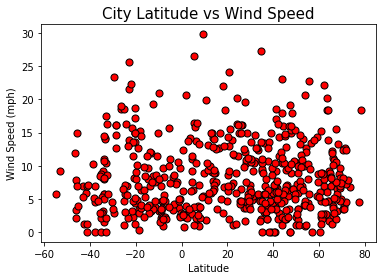

In [30]:
lat_plot = clean_city_data.plot(kind = 'scatter', x = 'Lat', y = 'Wind Speed', color = 'red', edgecolor = 'black', s = 50)
plt.title('City Latitude vs Wind Speed', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('scatter_plots/cities_wind_lat.png')

## Linear Regression

In [31]:
#Create Dataframes for northern and southern hemisphere cities
north_hemi = clean_city_data.loc[clean_city_data['Lat'] > 0]
south_hemi = clean_city_data.loc[clean_city_data['Lat'] < 0]
south_hemi = south_hemi.reset_index(drop = True)
north_hemi = north_hemi.reset_index(drop = True)

In [32]:
south_hemi.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,33.91,80,0,9.22,CL,1624178379
1,bluff,-46.6000,168.3333,39.79,89,63,11.97,NZ,1624178521
2,ancud,-41.8697,-73.8203,45.23,87,99,5.86,CL,1624178522
3,hithadhoo,-0.6000,73.0833,83.28,70,100,9.60,MV,1624178240
4,busselton,-33.6500,115.3333,54.05,88,75,14.18,AU,1624178523


In [33]:
north_hemi.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mattru,7.6244,-11.8332,75.74,94,100,0.85,SL,1624178520
1,qasigiannguit,68.8193,-51.1922,46.65,71,97,7.09,GL,1624178236
2,wanning,18.8003,110.3967,92.80,57,95,18.43,CN,1624178523
3,thompson,55.7435,-97.8558,42.96,87,75,5.75,CA,1624178268
4,yellowknife,62.4560,-114.3525,46.92,66,20,6.91,CA,1624178256


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

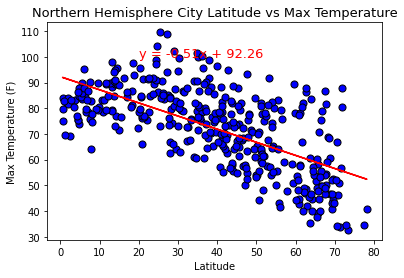

The r-squared value is 0.423315240497366


In [38]:
x_values = north_hemi['Lat']
y_values = north_hemi['Max Temp']

slope, intercept, r, p, se = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



nh_plot = north_hemi.plot(kind = 'scatter', x = 'Lat', y = 'Max Temp',color = 'blue', edgecolor = 'black', s = 50)
plt.plot(x_values, regression_values,'r-')
plt.annotate(line_eq, (20,100), fontsize=13, color = 'r')
plt.title('Northern Hemisphere City Latitude vs Max Temperature', fontsize = 13)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('scatter_plots/nh_temp_lat.png')
plt.show()

print(f'The r-squared value is {r**2}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

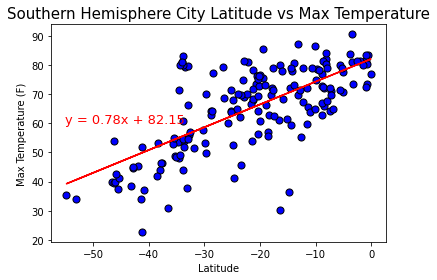

The r-squared value is 0.4878996899570017


In [42]:
x_values = south_hemi['Lat']
y_values = south_hemi['Max Temp']

slope, intercept, r, p, se = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



nh_plot = south_hemi.plot(kind = 'scatter', x = 'Lat', y = 'Max Temp',color = 'blue', edgecolor = 'black', s = 50)
plt.plot(x_values, regression_values,'r-')
plt.annotate(line_eq, (-55,60), fontsize=13, color = 'r')
plt.title('Southern Hemisphere City Latitude vs Max Temperature', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('scatter_plots/sh_temp_lat.png')
plt.show()
print(f'The r-squared value is {r**2}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.00032472460184737253


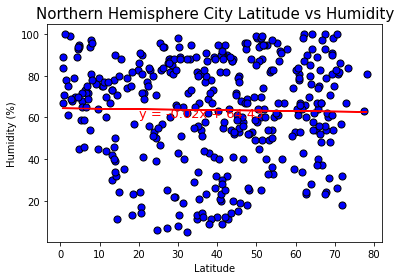

In [43]:
x_values = north_hemi['Lat']
y_values = north_hemi['Humidity']

slope, intercept, r, p, se = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-squared value is {r**2}')

nh_plot = north_hemi.plot(kind = 'scatter', x = 'Lat', y = 'Humidity',color = 'blue', edgecolor = 'black', s = 50)
plt.plot(x_values, regression_values,'r-')
plt.annotate(line_eq, (20,60), fontsize=13, color = 'r')
plt.title('Northern Hemisphere City Latitude vs Humidity', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('scatter_plots/nh_humid_lat.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.000386369146917911


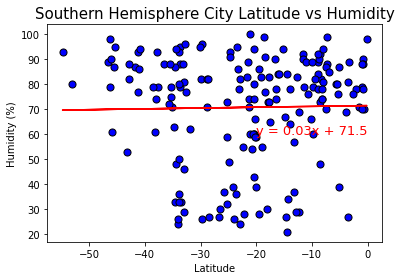

In [44]:
x_values = south_hemi['Lat']
y_values = south_hemi['Humidity']

slope, intercept, r, p, se = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-squared value is {r**2}')

nh_plot = south_hemi.plot(kind = 'scatter', x = 'Lat', y = 'Humidity',color = 'blue', edgecolor = 'black', s = 50)
plt.plot(x_values, regression_values,'r-')
plt.annotate(line_eq, (-20,60), fontsize=13, color = 'r')
plt.title('Southern Hemisphere City Latitude vs Humidity', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('scatter_plots/sh_humid_lat.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.0031623358616501866


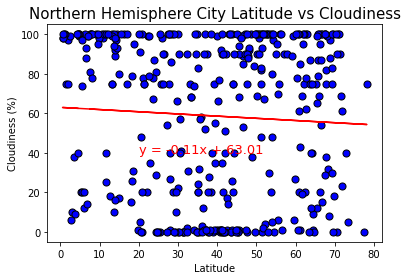

In [45]:
x_values = north_hemi['Lat']
y_values = north_hemi['Cloudiness']

slope, intercept, r, p, se = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-squared value is {r**2}')

nh_plot = north_hemi.plot(kind = 'scatter', x = 'Lat', y = 'Cloudiness',color = 'blue', edgecolor = 'black', s = 50)
plt.plot(x_values, regression_values,'r-')
plt.annotate(line_eq, (20,40), fontsize=13, color = 'r')
plt.title('Northern Hemisphere City Latitude vs Cloudiness', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('scatter_plots/nh_cloud_lat.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.011814336997548686


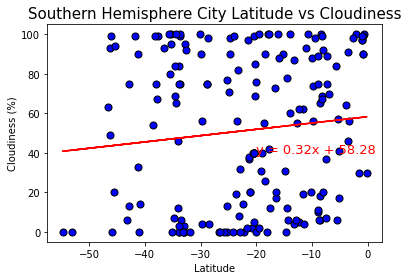

In [46]:
x_values = south_hemi['Lat']
y_values = south_hemi['Cloudiness']

slope, intercept, r, p, se = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-squared value is {r**2}')

nh_plot = south_hemi.plot(kind = 'scatter', x = 'Lat', y = 'Cloudiness',color = 'blue', edgecolor = 'black', s = 50)
plt.plot(x_values, regression_values,'r-')
plt.annotate(line_eq, (-20,40), fontsize=13, color = 'r')
plt.title('Southern Hemisphere City Latitude vs Cloudiness', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('scatter_plots/sh_cloud_lat.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.007190617654547478


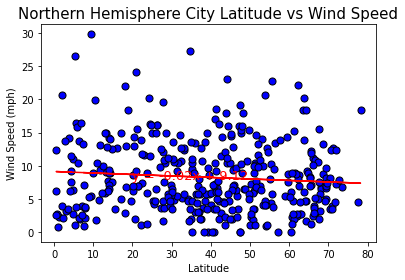

In [47]:
x_values = north_hemi['Lat']
y_values = north_hemi['Wind Speed']

slope, intercept, r, p, se = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-squared value is {r**2}')

nh_plot = north_hemi.plot(kind = 'scatter', x = 'Lat', y = 'Wind Speed',color = 'blue', edgecolor = 'black', s = 50)
plt.plot(x_values, regression_values,'r-')
plt.annotate(line_eq, (20,8), fontsize=13, color = 'r')
plt.title('Northern Hemisphere City Latitude vs Wind Speed', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('scatter_plots/nh_wind_lat.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.0032765415817735174


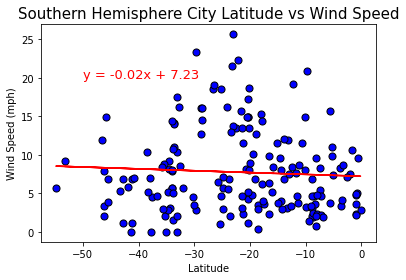

In [49]:
x_values = south_hemi['Lat']
y_values = south_hemi['Wind Speed']

slope, intercept, r, p, se = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-squared value is {r**2}')

nh_plot = south_hemi.plot(kind = 'scatter', x = 'Lat', y = 'Wind Speed',color = 'blue', edgecolor = 'black', s = 50)
plt.plot(x_values, regression_values,'r-')
plt.annotate(line_eq, (-50,20), fontsize=13, color = 'r')
plt.title('Southern Hemisphere City Latitude vs Wind Speed', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('scatter_plots/sh_wind_lat.png')